# Zestaw zadań: Metoda najmniejszych kwadratów
## Zadanie 1
### Autor: Artur Gęsiarz

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Importowanie danych do testowania

In [2]:
column_names = []
with open("../materialy/lab02/dataset/breast-cancer.labels") as f:
    for line in f:
        column_names.append(line.strip())

In [3]:
train_data = pd.io.parsers.read_csv("../materialy/lab02/dataset/breast-cancer-train.dat",
                                    names=column_names)

In [4]:
validate_data = pd.io.parsers.read_csv("../materialy/lab02/dataset/breast-cancer-validate.dat",
                                       names=column_names)

### Histogram charakterystyki promienia

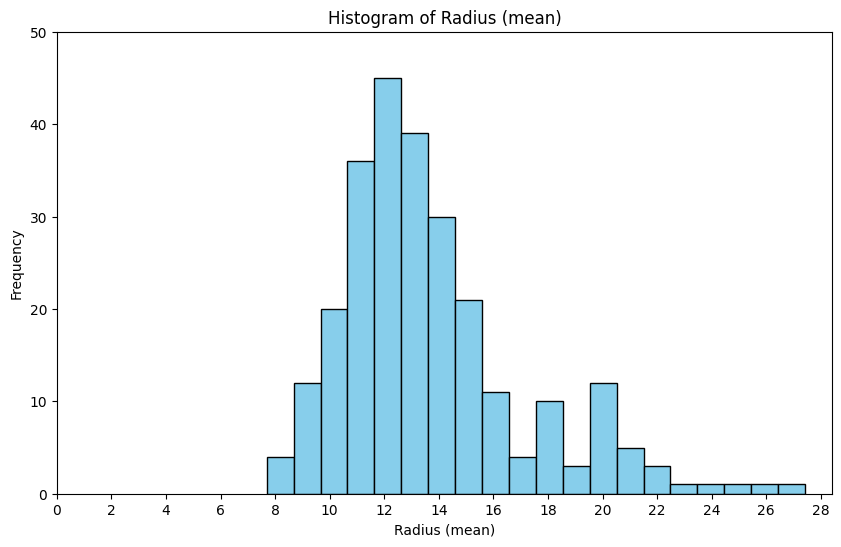

In [5]:
plt.figure(figsize=(10, 6))
plt.hist(validate_data['radius (mean)'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Radius (mean)')
plt.ylabel('Frequency')
plt.xticks(range(0, 30, 2))
plt.yticks(range(0, 60, 10))
plt.title('Histogram of Radius (mean)')
plt.show()

### Wykres charakterystyki promienia

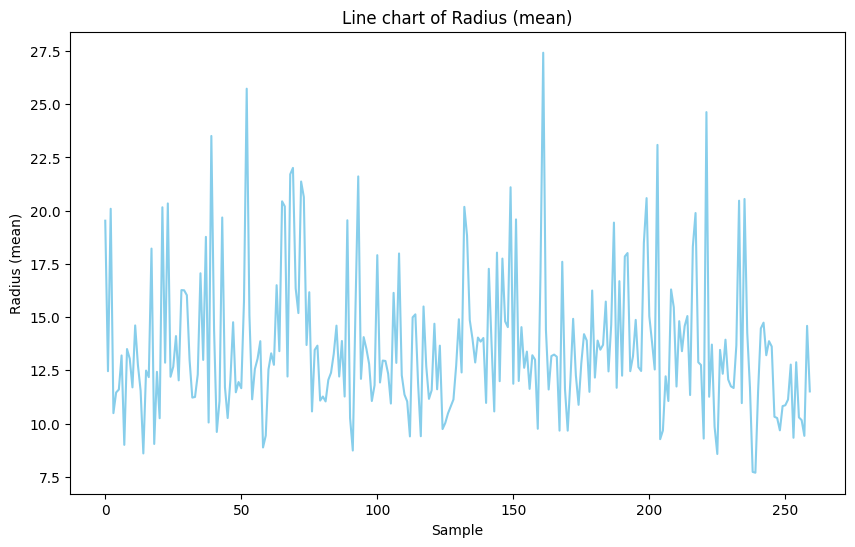

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(validate_data['radius (mean)'], color='skyblue')
plt.xlabel('Sample')
plt.ylabel('Radius (mean)')
plt.title('Line chart of Radius (mean)')
plt.show()

### Reprezentacja danych zawartych w obu zbiorach dla liniowej i kwadratowej metody najmniejszcyh kwadratów

In [7]:
linear_train = train_data.drop(columns=["Malignant/Benign"]).values
linear_validate = validate_data.drop(columns=["Malignant/Benign"]).values

quadratic_train = train_data[["radius (mean)", "perimeter (mean)", "area (mean)", "symmetry (mean)"]].values
quadratic_validate = validate_data[["radius (mean)", "perimeter (mean)", "area (mean)", "symmetry (mean)"]].values

### Wektor b dla obu zbiorów

In [8]:
b_train = np.where(train_data["Malignant/Benign"] == 'M', 1, -1)
b_validate = np.where(validate_data["Malignant/Benign"] == 'M', 1, -1)

### Wagi dla liniwej oraz kwadratowej metody najmniejszych kwadratow

In [9]:
linear_weights = np.linalg.solve(linear_train.T @ linear_train, linear_train.T @ b_train)
quadratic_weights = np.linalg.solve(quadratic_train.T @ quadratic_train, quadratic_train.T @ b_train)

### Współczynniki uwarunkowania macierzy

In [10]:
linear_condition_number = np.linalg.cond(linear_train.T @ linear_train)
quadratic_condition_number = np.linalg.cond(quadratic_train.T @ quadratic_train)

print(linear_condition_number, quadratic_condition_number)

1.1457577901421245e+22 828804275.0118532


### Sprawdzenie jak dobrze otrzymane wagi przewidują typ nowotworu

In [11]:
linear_predictions = linear_validate @ linear_weights
quadratic_predictions = quadratic_validate @ quadratic_weights

linear_predictions = np.where(linear_predictions > 0, 1, -1)
quadratic_predictions = np.where(quadratic_predictions > 0, 1, -1)

linear_false_positives = np.sum((linear_predictions == 1) & (b_validate == -1))
linear_false_negatives = np.sum((linear_predictions == -1) & (b_validate == 1))

quadratic_false_positives = np.sum((quadratic_predictions == 1) & (b_validate == -1))
quadratic_false_negatives = np.sum((quadratic_predictions == -1) & (b_validate == 1))

print(linear_false_positives, quadratic_false_positives, linear_false_negatives, quadratic_false_negatives)


In [12]:
methods = ['Linear', 'Quadratic']
false_positives = [linear_false_positives, quadratic_false_positives]
false_negatives = [linear_false_negatives, quadratic_false_negatives]

plt.figure(figsize=(8, 6))
plt.bar(methods, false_positives, color='skyblue', label='False Positives')
plt.bar(methods, false_negatives, color='lightgreen', label='False Negatives', bottom=false_positives)

plt.xlabel('Method')
plt.ylabel('Number of cases')
plt.title('Comparison of false positive and false negative cases')
plt.legend()
plt.show()

# Podsumowanie

### Analizując wyniki, można zauważyć, że zarówno liniowa, jak i kwadratowa metoda najmniejszych kwadratów miały podobne wyniki w przypadku fałszywie ujemnych, ale miały różne wyniki w przypadku fałszywie dodatnich.

### Lepiej poradziła sobie metoda liniowa poniewaz ma mniej przypadkow falszywie dodanich tak jak ma to metoda kwadratowa.
### Jednak porównując współczynniki uwarunkowania macierzy znacznie większy ma metoda liniowa od kwadratowej.

### Podsumowując, różnice w wynikach między liniową a kwadratową metodą najmniejszych kwadratów mogą wynikać z różnych czynników, takich jak złożoność modelu, rozmiar zestawu treningowego, wybór cech i zakłócenia w danych.